In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('tmdb_movies.csv')
df_genres = pd.read_csv('tmdb_genres.csv')

In [11]:
df[(df['vote_count'] > df['vote_count'].quantile(0.75))].nlargest(10, 'vote_average')

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
65,65,185000000,http://thedarkknight.warnerbros.com/dvdsite/,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,Released,Why So Serious?,The Dark Knight,8.2,12002,18.0
690,690,60000000,http://thegreenmile.warnerbros.com/,497,en,The Green Mile,A supernatural tale set on death row in a Sout...,103.698022,1999-12-10,284600000,189.0,Released,Miracles do happen.,The Green Mile,8.2,4048,14.0


In [12]:
df["release_date"]=df["release_date"].str.split(pat="-").str[0]

In [13]:
df['release_date']=df['release_date'].fillna(0)
df['release_date'] = df['release_date'].astype(int)
df_restricted=df[(df['release_date'] > 2009) & (df['release_date'] < 2017) ]

In [14]:
df_revenue=df_restricted.groupby(['release_date'])['revenue'].mean()
df_budget=df_restricted.groupby(['release_date'])['budget'].mean()

date=df_revenue.to_frame()
date['release_date'] = date.index

date=date['release_date']
date=date.to_numpy()

revenue=df_revenue.to_frame()

revenue=revenue['revenue']
revenue=revenue.to_numpy()
revenue/=1000000
budget=df_budget.to_frame()
budget=budget['budget']
budget=budget.to_numpy()
budget/=1000000

fig, ax = plt.subplots()

ax.bar(date,revenue)
ax.plot(date,budget,color="r")
ax.set_xlabel("year")
ax.set_ylabel("money (in millions)")
ax.legend(["budget", "revenues"])
plt.title("Mean revenue and budget of movies between 2010 and 2016")

In [15]:
df_genres.rename(columns={"genres":"genre"},inplace=True)

In [16]:
df_genres.rename(columns={"Unnamed: 0" :"genre_id"},inplace=True)

In [17]:
df_new=df
df_genres=df_genres.set_index('genre_id')
df_joined=df_new.join(df_genres,on='genre_id')

In [18]:
f"{df_joined.groupby(['genre']).size().idxmax()} {df_joined.groupby(['genre']).size().max()}"

'Drama 1207'

Najczęściej pojawia się film z kategorii Drama (1207 razy).

In [19]:
df_joined_information=df_joined.groupby(["genre"])["runtime"].mean()

In [20]:
f"{df_joined_information.idxmax()} {df_joined_information.max()}"

'History 133.96'

In [21]:
df_joined=df_joined[(df_joined['genre'] == 'History')  ]

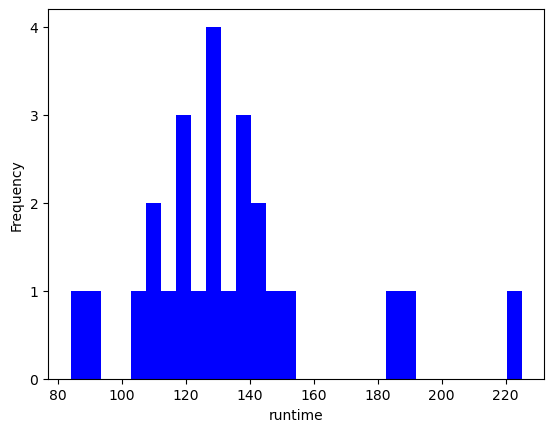

In [22]:
#df_joined['runtime'].hist(bins=30).locator_params(axis='y', integer=True)
df_joined['runtime'].plot(kind='hist',bins=30,color='b',xlabel="runtime").locator_params(axis='y', integer=True)